In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile

samplerate, data = wavfile.read('FISHER - Losing It (Official Audio).wav')

assert(data.shape[-1] == 2)

data = data.mean(axis=-1)

data = data / np.max(np.abs(data))


# new_samplerate = 700
# new_samplerate = 1000
# new_samplerate = 2048
new_samplerate = 1024
# new_samplerate = 1000
# new_samplerate = 4096
# new_samplerate = 1024
resample_pos = np.linspace(0, len(data), int(len(data) * new_samplerate / samplerate))
# print(resample_pos.shape)
# print(data.shape)
# new_data = scipy.interpolate.interp1d(, data)
new_data = np.interp(resample_pos, np.arange(0, len(data)), data)
# print(len(new_data))

samplerate = new_samplerate
data = new_data


print(np.min(data), np.max(data))
data

-0.9987592426588208 0.99225877358802


array([0., 0., 0., ..., 0., 0., 0.])

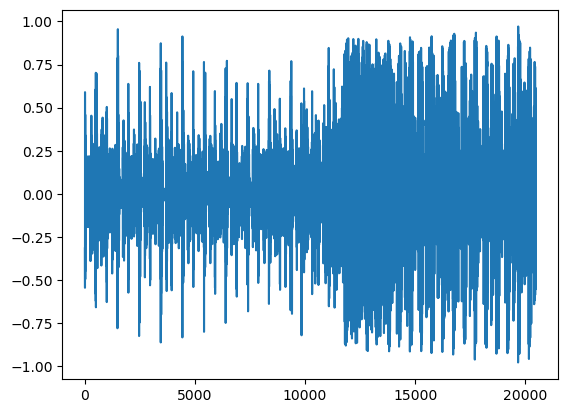

In [2]:
section_start = samplerate * 4
section_end = samplerate * 24
section_data = data[section_start:section_end]

plt.plot(section_data)

fft size: 16384
bpm: 95.62431248624972


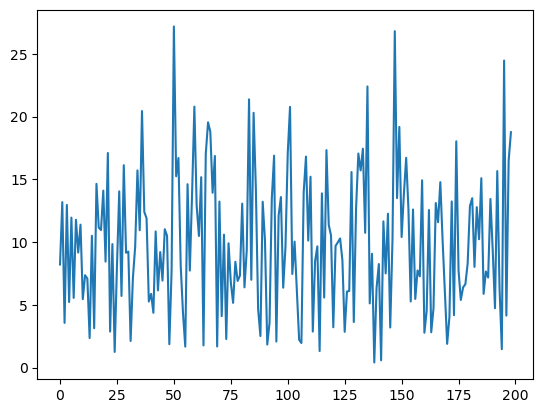

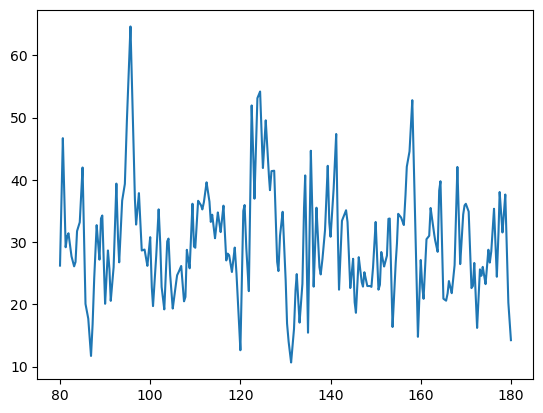

In [3]:
# fft = np.abs(np.fft.rfft(data[samplerate * 12:][-4096:]))
# fft = np.abs(np.fft.rfft(data[samplerate * 12:samplerate * 24]))

fft_input = data[samplerate * 3:][-(samplerate * 16):]

fft = np.abs(np.fft.fft(fft_input))
# fft = np.abs(np.fft.rfft(data[samplerate * 12:][-(samplerate * 4):]))
print(f'fft size: {len(fft)}')

min_idx = 80 / 60 * (2 * len(fft)) / samplerate
max_idx = 180 / 60 * (2 * len(fft)) / samplerate
points = np.linspace(min_idx, max_idx, 50000)
indices = np.arange(0, len(fft))
max_sum = -np.inf
max_point = None
sums = np.zeros_like(points)
for i in range(len(points)):
    point = points[i]
    sum = 0
    # for mult in range(1, 8):
    #     # sum += np.log(np.interp(mult * point, indices, magnitudes))
    #     sum += 1/mult * np.interp(mult * point, indices, magnitudes)
    for mult in range(1, 4):
        sum += np.interp(mult * point, indices, fft)
    sums[i] = sum
    if sum >= max_sum:
        max_sum = sum
        max_point = point

# print(f'max_point')
plt.figure()
plt.plot(fft[1:200])

plt.figure()
plt.plot(points * samplerate / (2 * len(fft)) * 60, sums)

print(f'bpm: {max_point * samplerate / (2 * len(fft)) * 60}')

# times = np.arange(len(input)) / samplerate
# plt.plot(times, output)
